In [1]:
import pandas as pd
import numpy as np

from scipy.stats import kstest

import matplotlib.pyplot as plt

from sklearn.metrics import f1_score

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

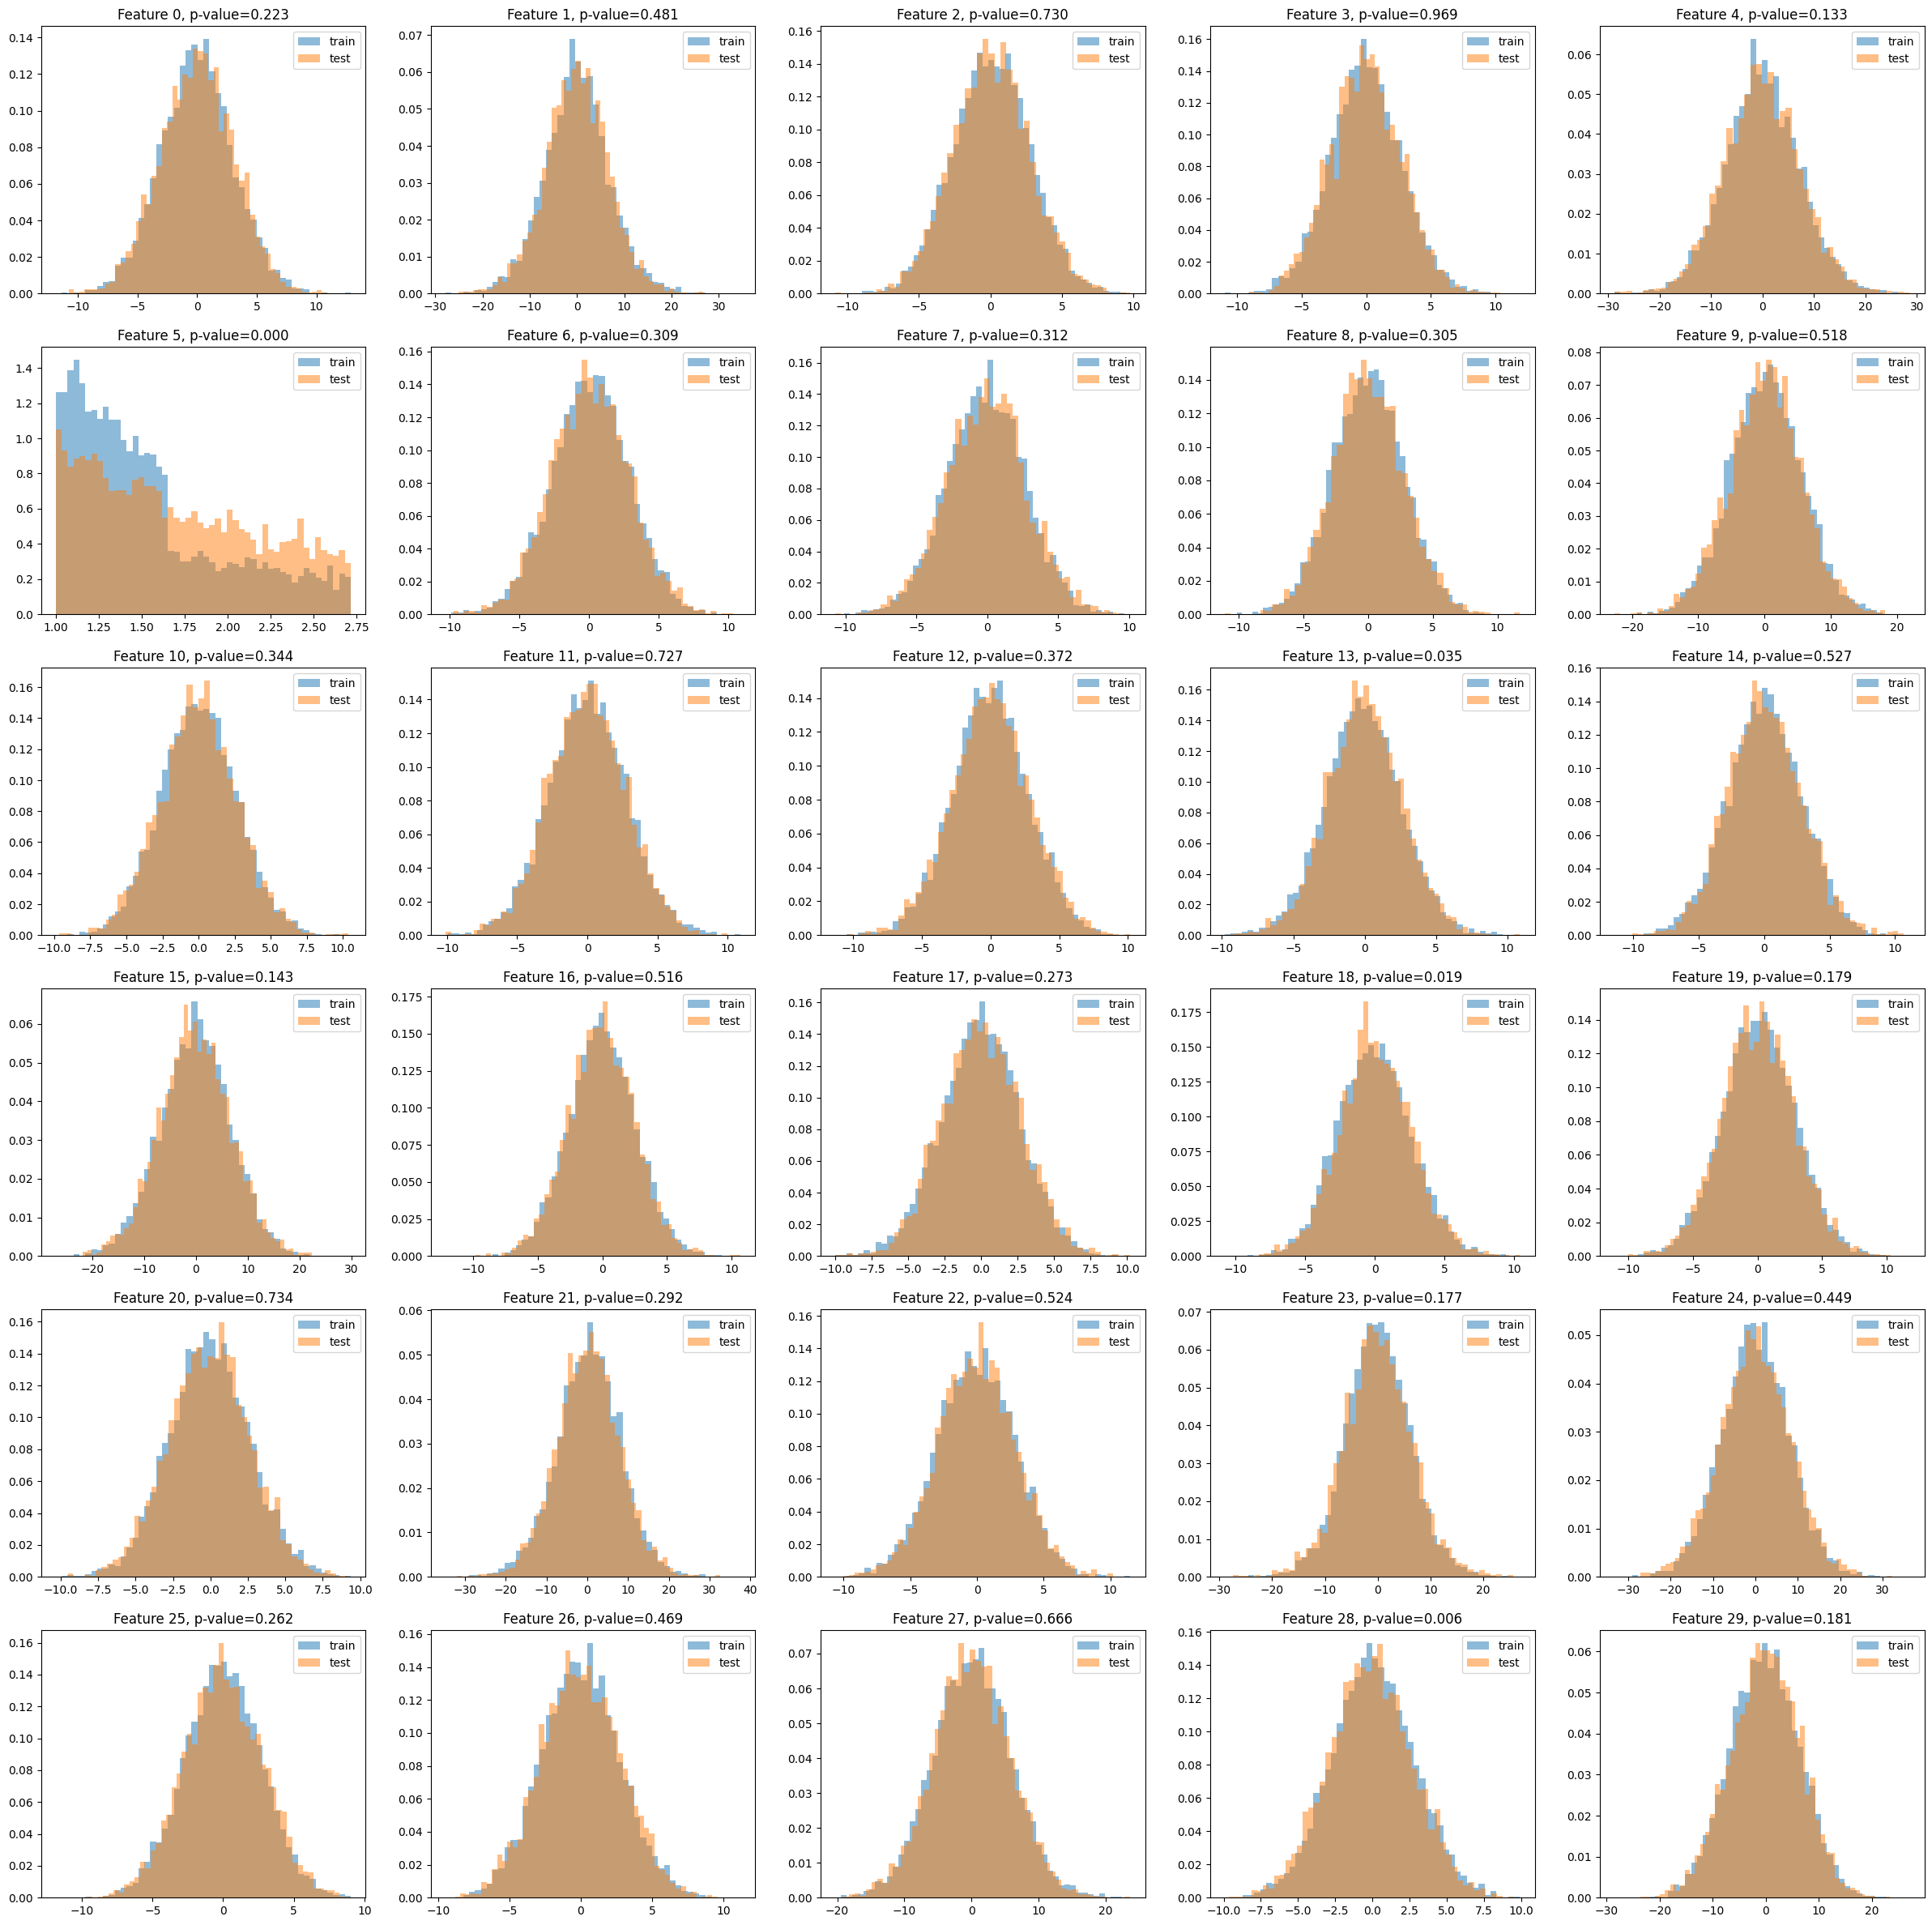

In [3]:
fig, axes = plt.subplots(6, 5, figsize=(30, 30))

for ax, col in zip(axes.flatten(), train.columns[:-1]):
    pval = kstest(train[col], test[col]).pvalue

    ax.hist(train[col], bins=50, label='train', density=True, alpha=.5)
    ax.hist(test[col], bins=50, label='test', density=True, alpha=.5)
    ax.set_title(f'Feature {col}, p-value={pval:.3f}')
    ax.legend()

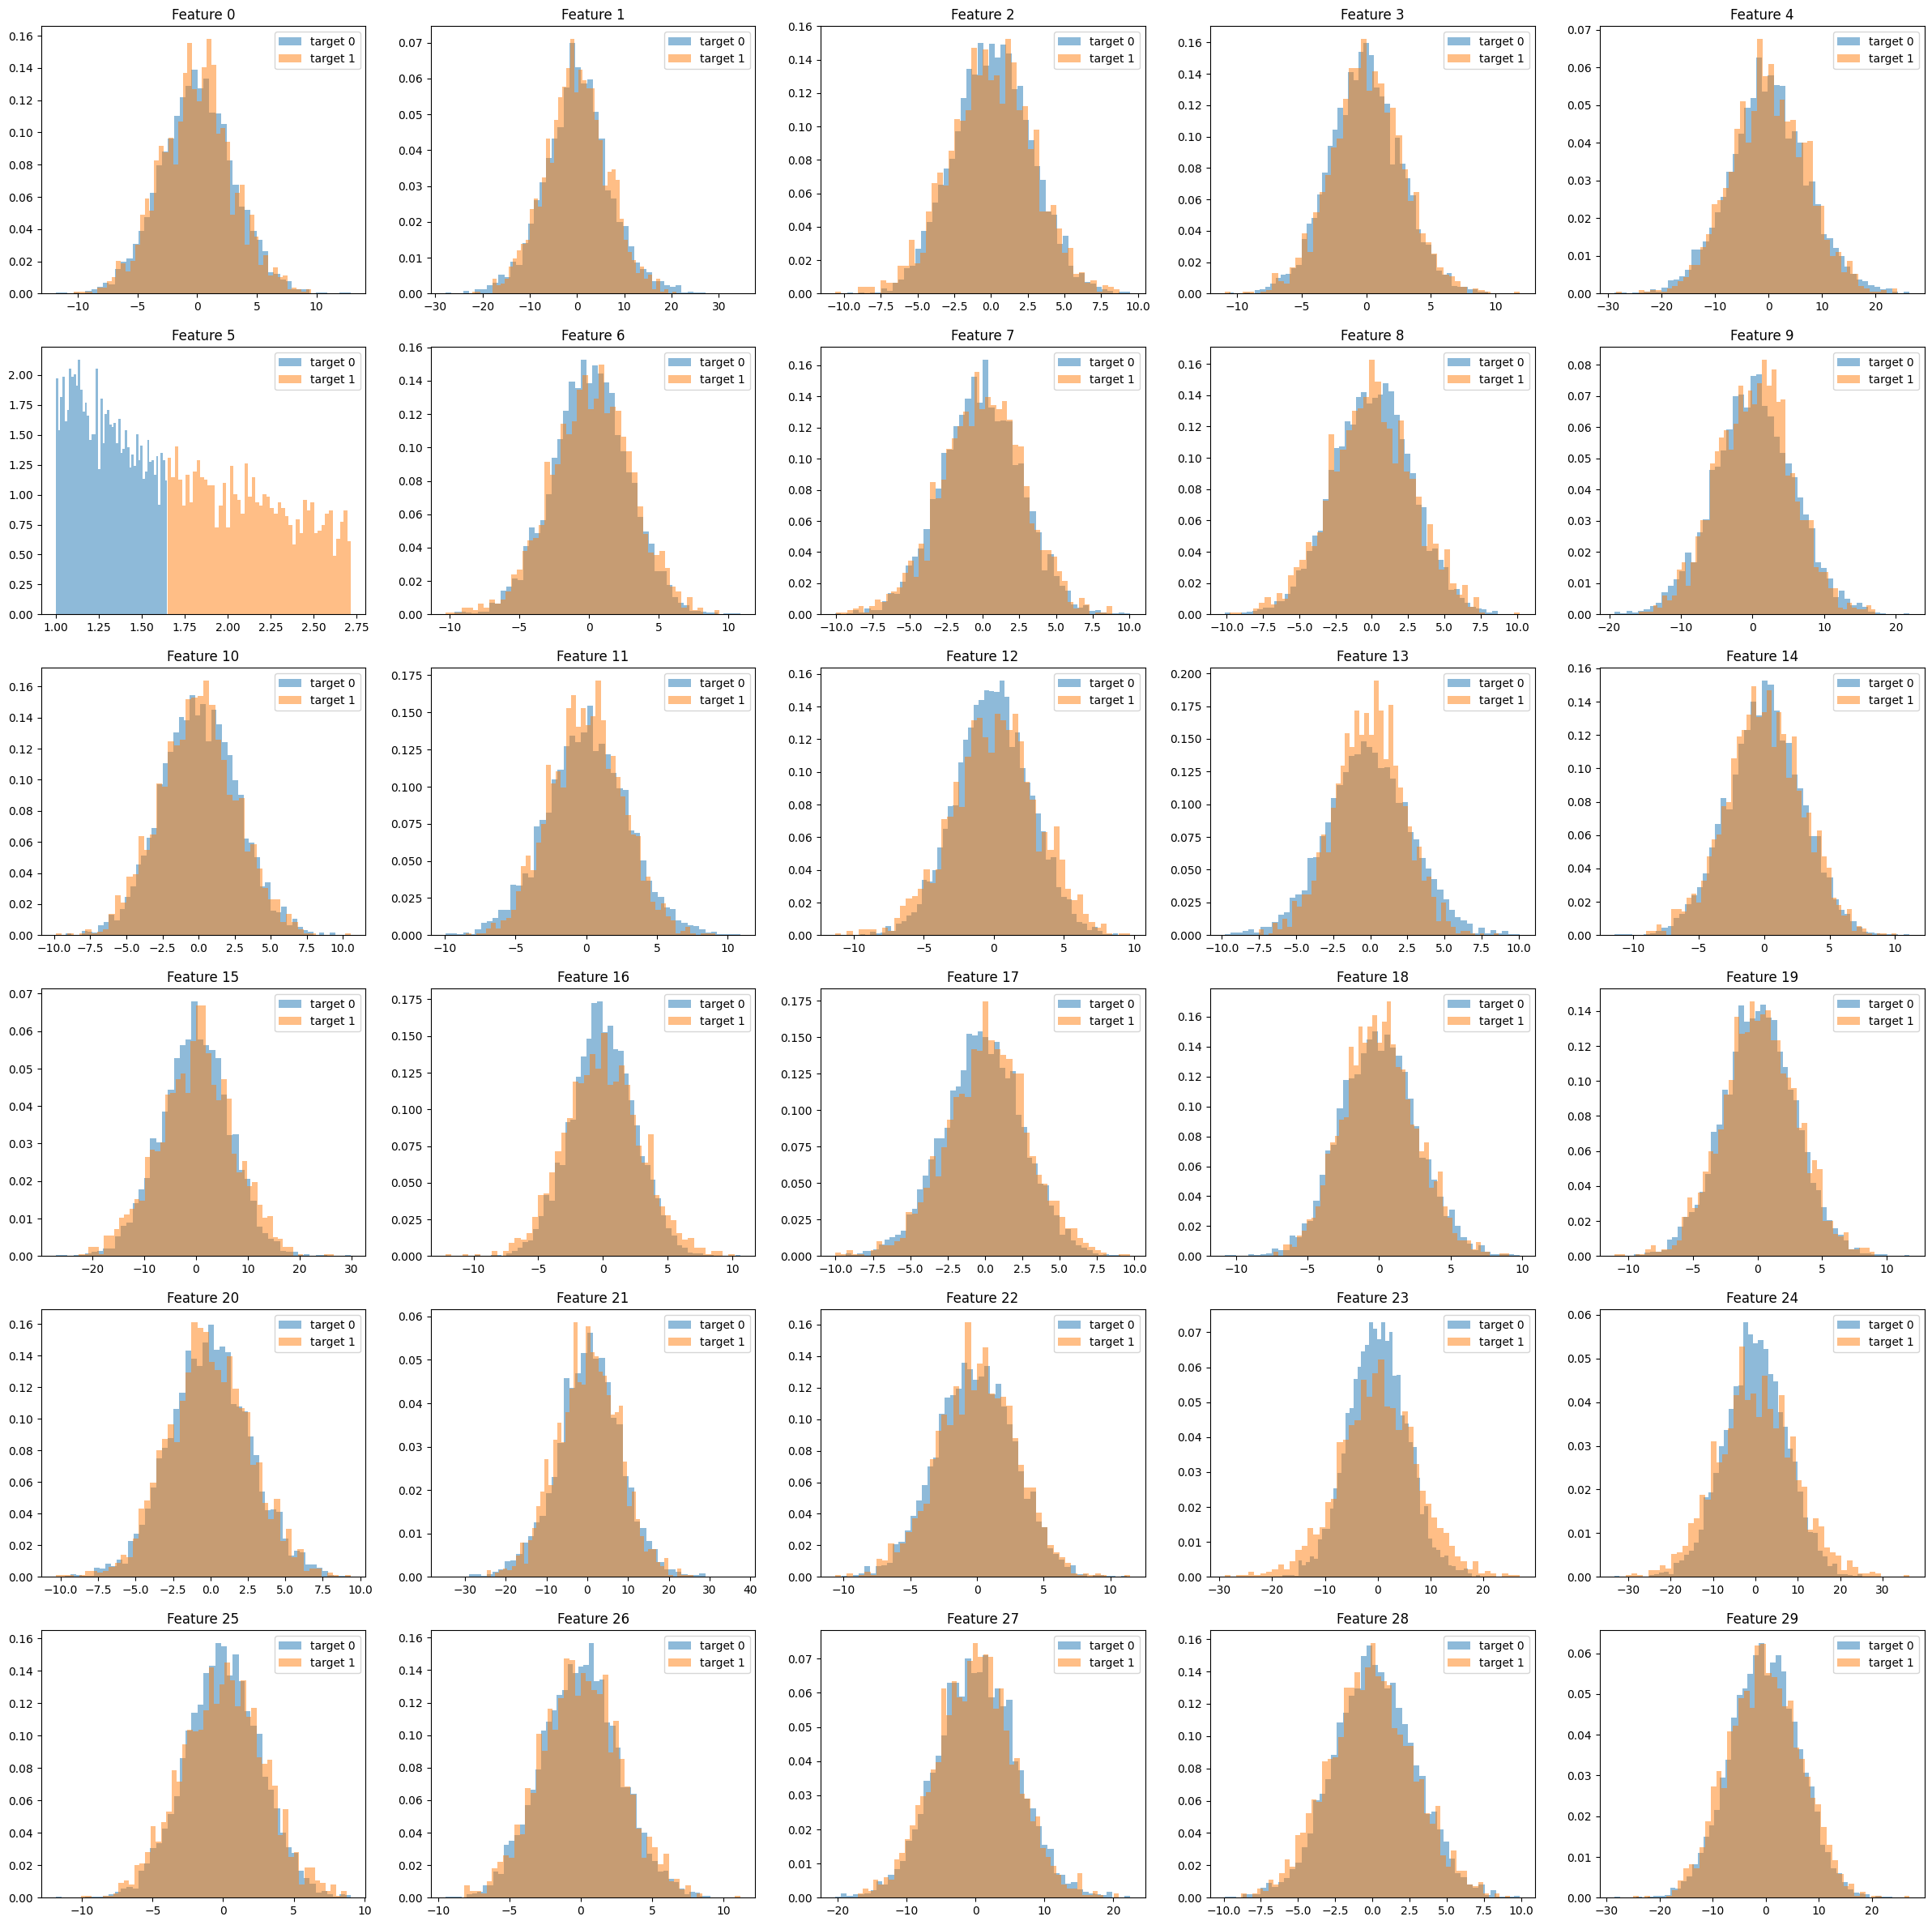

In [4]:
fig, axes = plt.subplots(6, 5, figsize=(30, 30))

for ax, col in zip(axes.flatten(), train.columns[:-1]):
    ax.hist(train[train['target'] == 0][col], bins=50, label='target 0', density=True, alpha=.5)
    ax.hist(train[train['target'] == 1][col], bins=50, label='target 1', density=True, alpha=.5)
    ax.set_title(f'Feature {col}')
    ax.legend()

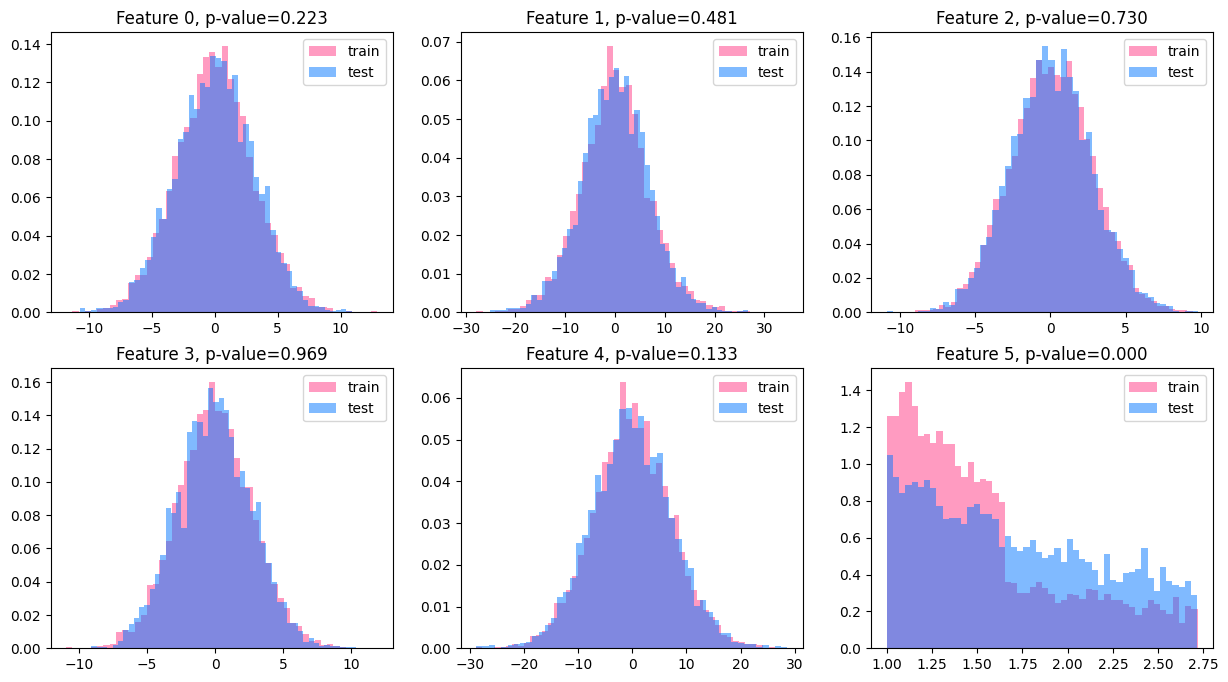

In [5]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

for ax, col in zip(axes.flatten(), train.columns[:-1]):
    pval = kstest(train[col], test[col]).pvalue

    ax.hist(train[col], bins=50, label='train', density=True, alpha=.5, color='#FF3985')
    ax.hist(test[col], bins=50, label='test', density=True, alpha=.5, color='#0277FF')
    ax.set_title(f'Feature {col}, p-value={pval:.3f}')
    ax.legend()

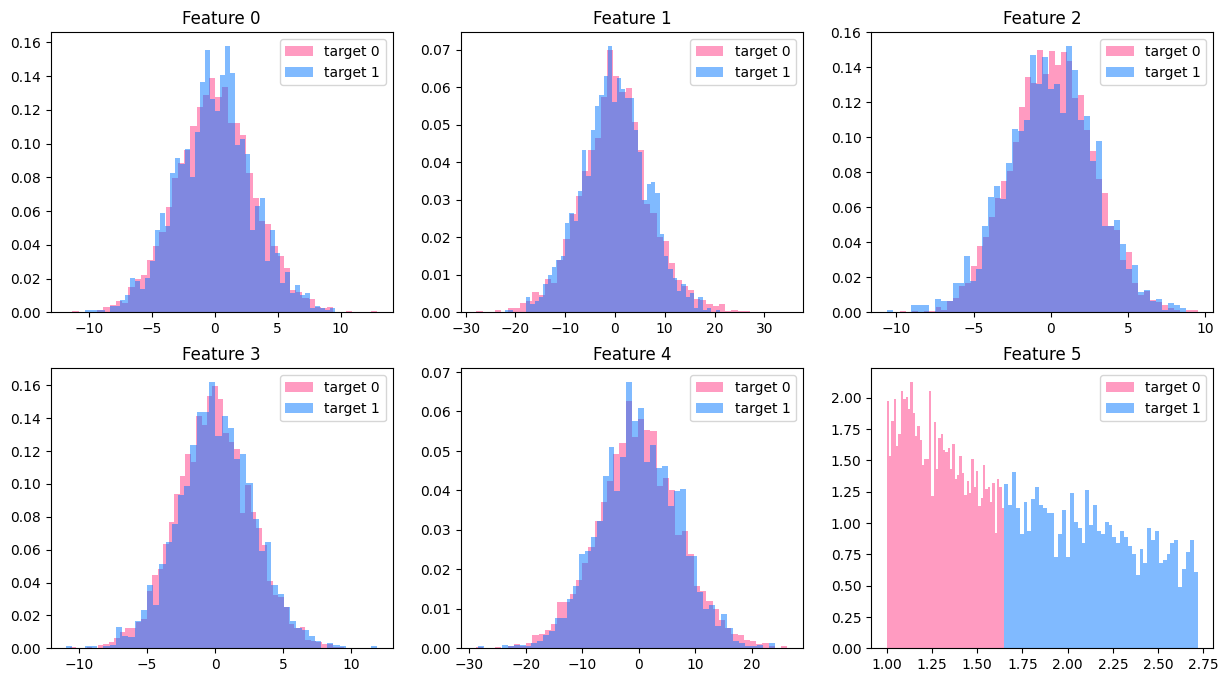

In [6]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

for ax, col in zip(axes.flatten(), train.columns[:-1]):
    ax.hist(train[train['target'] == 0][col], bins=50, label='target 0', density=True, alpha=.5, color='#FF3985')
    ax.hist(train[train['target'] == 1][col], bins=50, label='target 1', density=True, alpha=.5, color='#0277FF')
    ax.set_title(f'Feature {col}')
    ax.legend()

<Axes: >

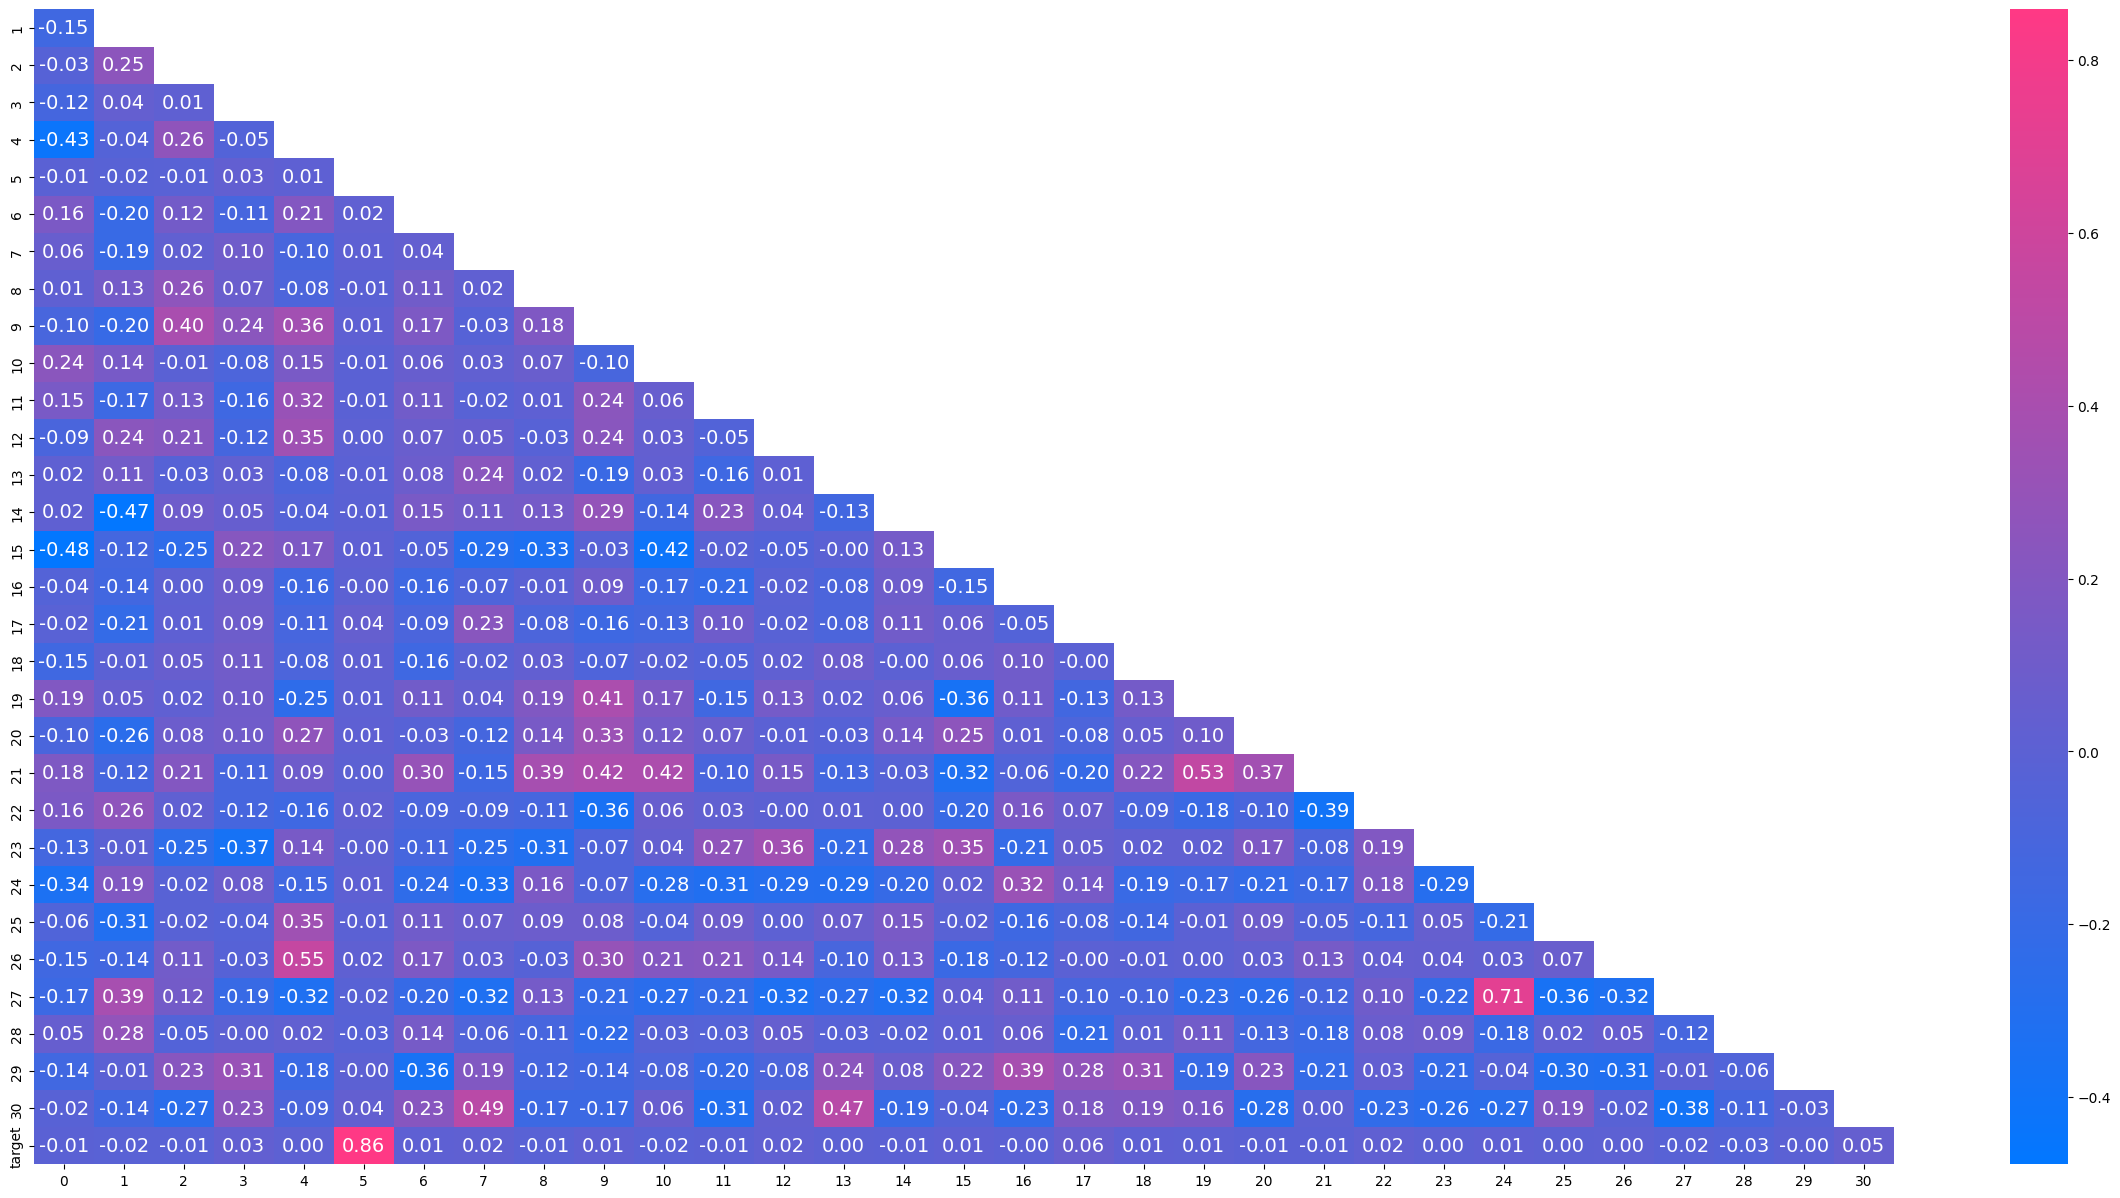

In [7]:
import seaborn as sns
from matplotlib.colors import ListedColormap

corr = train.corr()

f, ax = plt.subplots(figsize=(30, 15))
#
# Generate a mask for upper traingle
#
mask = np.triu(np.ones_like(corr, dtype=bool))
#
# Configure a custom diverging colormap
#
low_color = '#0277FF'
high_color = '#FF3985'

# Create a custom colormap
colors = sns.blend_palette([low_color, high_color], as_cmap=True)

# Create a heatmap with the custom color palette
# Draw the heatmap
#
sns.heatmap(corr.iloc[1:, :-1], annot=True, mask = mask[1:, :-1], cmap=colors, fmt=".2f", annot_kws={"size": 14})

In [10]:
lr_probs = np.load('lr_probs.npy')
y_val = np.load('y_val.npy')

Ensemble: f1=0.913 auc=0.976


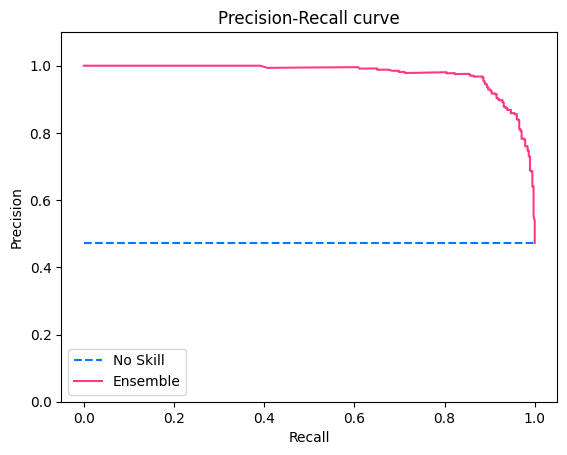

In [11]:
from sklearn.metrics import precision_recall_curve, auc


# predict class values
yhat = np.int32(lr_probs >= 0.5)
lr_precision, lr_recall, _ = precision_recall_curve(y_val, lr_probs)
lr_f1, lr_auc = f1_score(y_val, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Ensemble: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_val[y_val==1]) / len(y_val)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', color='#0277FF', label='No Skill')
plt.plot(lr_recall, lr_precision, color='#FF3985', label='Ensemble')
plt.ylim(0, 1.1)
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()

plt.title('Precision-Recall curve')
# show the plot
plt.show()